## Hello everyone,
### Welcome to my notebook As we know our problem statement is to identify the Type of Music

Now,

Importing the required Libraries

In [1]:
import os 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score

In [2]:
from sklearn import tree

In [3]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Importing dataset into pandas

1.Importing the data into our pandas.

2.Train (saving are training dataset ).

3.Test (saving are testing dataset)

4.Test1 for prediction file indexing

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test1 = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

## Performing EDA 



In [5]:
train.head(5)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [6]:
test.head(5)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [7]:
train.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [8]:
test.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   132
owns_house                   0
no_of_children             190
net_yearly_income            0
no_of_days_employed        105
occupation_type              0
total_family_members        31
migrant_worker              26
yearly_debt_payments        22
credit_limit                 0
credit_limit_used(%)         0
credit_score                 3
prev_defaults                0
default_in_last_6months      0
dtype: int64

In [9]:
train.shape, test.shape

((45528, 19), (11383, 18))

In [10]:
train.dtypes

customer_id                 object
name                        object
age                          int64
gender                      object
owns_car                    object
owns_house                  object
no_of_children             float64
net_yearly_income          float64
no_of_days_employed        float64
occupation_type             object
total_family_members       float64
migrant_worker             float64
yearly_debt_payments       float64
credit_limit               float64
credit_limit_used(%)         int64
credit_score               float64
prev_defaults                int64
default_in_last_6months      int64
credit_card_default          int64
dtype: object

In [11]:
test.dtypes

customer_id                 object
name                        object
age                          int64
gender                      object
owns_car                    object
owns_house                  object
no_of_children             float64
net_yearly_income          float64
no_of_days_employed        float64
occupation_type             object
total_family_members       float64
migrant_worker             float64
yearly_debt_payments       float64
credit_limit               float64
credit_limit_used(%)         int64
credit_score               float64
prev_defaults                int64
default_in_last_6months      int64
dtype: object

## After the Exploration of data,
## What we got to know
1.Shape or our data.

2.Null / Missing values in our Dataset.


## Visualizing the Data,

1.From Seaborn Countplot.

2.Heatmap for viewing the strength and directions.

3.By this we able to see Positive/Negative correlation between feature.


C:\Users\Trapti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credit_card_default', ylabel='count'>

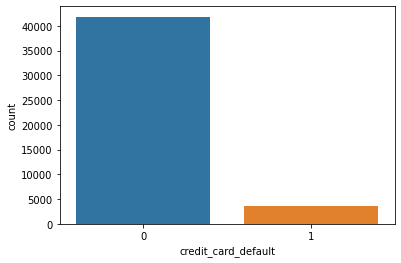

In [12]:
sns.countplot(train['credit_card_default'])

<AxesSubplot:>

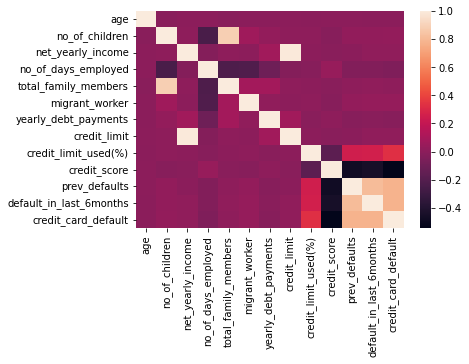

In [13]:
sns.heatmap(train.corr())

# Feature Engineering part

1.Filling the Null values

2.Converting the categrical features into numeric for better performance of our Model.

3.Dropping irrelevant Feature.

4.Recheck the Data

In [14]:
def fill_missing_values(train):
    missing_val_columns = train.isnull().sum()[train.isnull().sum() > 0]
    missing_val_columns = list(missing_val_columns.index)
    for col in missing_val_columns:
        mode = train[col].mode().iloc[0]
        print(f"Filling all values in {col} column with: {mode}")
        train[col] = train[col].fillna(mode)
    return train

In [15]:
def fill_missing_values(test):
    missing_val_columns = test.isnull().sum()[test.isnull().sum() > 0]
    missing_val_columns = list(missing_val_columns.index)
    for col in missing_val_columns:
        mode = test[col].mode().iloc[0]
        print(f"Filling all values in {col} column with: {mode}")
        test[col] = test[col].fillna(mode)
    return test

In [16]:
train = fill_missing_values(train)

Filling all values in owns_car column with: N
Filling all values in no_of_children column with: 0.0
Filling all values in no_of_days_employed column with: 365246.0
Filling all values in total_family_members column with: 2.0
Filling all values in migrant_worker column with: 0.0
Filling all values in yearly_debt_payments column with: 7598.4
Filling all values in credit_score column with: 670.0


In [17]:
test = fill_missing_values(test)

Filling all values in owns_car column with: N
Filling all values in no_of_children column with: 0.0
Filling all values in no_of_days_employed column with: 365248.0
Filling all values in total_family_members column with: 2.0
Filling all values in migrant_worker column with: 0.0
Filling all values in yearly_debt_payments column with: 15470.98
Filling all values in credit_score column with: 665.0


In [18]:
train.isnull().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [19]:
test.isnull().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
dtype: int64

In [20]:
train.dtypes

customer_id                 object
name                        object
age                          int64
gender                      object
owns_car                    object
owns_house                  object
no_of_children             float64
net_yearly_income          float64
no_of_days_employed        float64
occupation_type             object
total_family_members       float64
migrant_worker             float64
yearly_debt_payments       float64
credit_limit               float64
credit_limit_used(%)         int64
credit_score               float64
prev_defaults                int64
default_in_last_6months      int64
credit_card_default          int64
dtype: object

In [21]:
test.dtypes

customer_id                 object
name                        object
age                          int64
gender                      object
owns_car                    object
owns_house                  object
no_of_children             float64
net_yearly_income          float64
no_of_days_employed        float64
occupation_type             object
total_family_members       float64
migrant_worker             float64
yearly_debt_payments       float64
credit_limit               float64
credit_limit_used(%)         int64
credit_score               float64
prev_defaults                int64
default_in_last_6months      int64
dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns

for i in var_mod:
        train[i] = le.fit_transform(train[i])

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = test.select_dtypes(include='object').columns

for i in var_mod:
        test[i] = le.fit_transform(test[i])

In [24]:
train["no_of_children"]= train["no_of_children"].astype(int)
train["no_of_days_employed"]= train["no_of_days_employed"].astype(int)
train["total_family_members"]= train["total_family_members"].astype(int)
train["migrant_worker"]= train["migrant_worker"].astype(int)

In [25]:
test["no_of_children"]= test["no_of_children"].astype(int)
test["no_of_days_employed"]= test["no_of_days_employed"].astype(int)
test["total_family_members"]= test["total_family_members"].astype(int)
test["migrant_worker"]= test["migrant_worker"].astype(int)

In [26]:
test.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,7322,1992,52,0,1,0,0,232640.53,998,17,2,0,14406.73,26524.40,4,779.0,0,0
1,4982,1923,48,0,0,0,1,284396.79,1338,17,3,0,57479.99,68998.72,70,806.0,0,0
2,6579,2228,50,0,0,0,1,149419.28,1210,17,3,0,21611.01,25187.80,71,528.0,2,0
3,4119,1016,30,0,0,0,1,160437.54,503,8,2,1,28990.76,29179.39,9,815.0,0,0
4,7652,1384,52,1,0,1,0,233480.37,157,8,2,1,54213.72,82331.82,82,613.0,1,1


In [27]:
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,10412,3939,46,0,0,1,0,107934.04,612,17,1,1,33070.28,18690.93,73,544.0,2,1,1
1,14993,170,29,1,0,1,0,109862.62,2771,8,2,0,15329.53,37745.19,52,857.0,0,0,0
2,6404,3557,37,1,0,1,0,230153.17,204,8,2,0,48416.60,41598.36,43,650.0,0,0,0
3,19491,2899,39,0,0,1,0,122325.82,11941,3,2,0,22574.36,32627.76,20,754.0,0,0,0
4,35467,2289,46,1,1,1,0,387286.00,1459,3,1,0,38282.95,52950.64,75,927.0,0,0,0


In [28]:
train['no_of_children'].value_counts()

0    32015
1     8985
2     3862
3      584
4       60
5       13
6        6
7        1
8        1
9        1
Name: no_of_children, dtype: int64

# Splitting the Dependent and Independent Feature into (X,y)

In [29]:
X = train.drop(['credit_card_default'],axis=1)
y = train['credit_card_default']

In [30]:
X.shape,y.shape,test.shape

((45528, 18), (45528,), (11383, 18))

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state =0)

In [32]:
from sklearn.metrics import accuracy_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators = 10000)
rfr.fit(X_train,y_train)
#Predicting the Test set results
y_pred_rfr = rfr.predict(X_test)

accuracy_score(y_test,y_pred_rfr)

0.9817702613661322

In [38]:
cr = classification_report(y_test, y_pred_rfr) 
print(cr) 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8372
           1       0.00      0.00      0.00       734

    accuracy                           0.92      9106
   macro avg       0.46      0.50      0.48      9106
weighted avg       0.85      0.92      0.88      9106



In [39]:
100*(f1_score(y_test,y_pred_rfr, average="macro"))

47.82259912903965

## Saving prediction file

-We need to create a dataframe 
- Need to save the index file (customer_id)

In [41]:
test_pred1 = rfr.predict(test)

In [44]:
dff = pd.DataFrame()
dff['customer_id'] = test1['customer_id']
dff['credit_card_default'] = test_pred1

In [45]:
dff.to_csv('model.csv',index=False)

## You can do hypertuning & Scaling & Sampling as per your Model, 
It's just a basic ml model on how you can submit submission file on HackerEarth



### Thankyou